In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df_wine = pd.read_csv("../data/wine.csv")
df_wine.columns =  ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


# L1 regularization
# liblinear supports both L1 and L2 regularization

# Note that C=1.0 is the default value. You can increase
# or decrease it to make the regularization effect 
# stronger or weaker, respectively.
lr = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    multi_class='ovr'
)

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))


Training accuracy: 1.0
Test accuracy: 1.0


In [2]:
# Bias values

lr.intercept_

array([-1.26306996, -1.21589924, -2.37026432])

In [3]:
# w_j values

lr.coef_

array([[ 1.24565241,  0.18057587,  0.74233666, -1.15961066,  0.        ,
         0.        ,  1.17547621,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54090077,  2.51115979],
       [-1.53691321, -0.38737363, -0.99556379,  0.36503722, -0.05950464,
         0.        ,  0.66801334,  0.        ,  0.        , -1.93389667,
         1.23386255,  0.        , -2.23199123],
       [ 0.13580211,  0.16839283,  0.35716791,  0.        ,  0.        ,
         0.        , -2.43807904,  0.        ,  0.        ,  1.56370784,
        -0.81884496, -0.49224517,  0.        ]])

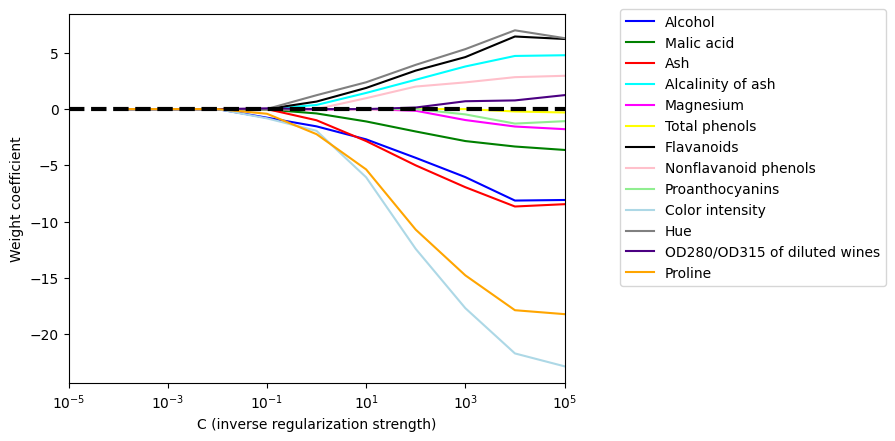

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()